**CHANDRAKANT B THAKUR**

Stock Market Prediction using Numerical and Textual Analysis

In [ ]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Analysis Libraries
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [ ]:
!pip install pandas-datareader

In [ ]:
import pandas_datareader.data as web
import datetime
from pandas import Series,DataFrame

In [ ]:
start=datetime.datetime(2010,1,1)
end=datetime.datetime(2020,1,11)

In [ ]:
from google.colab import files
upload=files.upload()

Saving india-news-headlines.csv to india-news-headlines.csv


In [ ]:
df=pd.read_csv("india-news-headlines.csv")
df

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
4994,20010529,city.mumbai,Worli seawall in decrepit state
4995,20010529,city.mumbai,Residents upbeat about Premier's second coming
4996,20010529,city.bengaluru,Flashback time: remembering Jim Corbett
4997,20010529,city.hyderabad,Oracle to invest $15m in development centre


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   publish_date       4999 non-null   int64 
 1   headline_category  4999 non-null   object
 2   headline_text      4999 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [ ]:
df.describe()

,publish_date
count,4.999000e+03
mean,2.001032e+07
std,1.515708e+02
min,2.001010e+07
25%,2.001020e+07
50%,2.001032e+07
75%,2.001043e+07
max,2.001053e+07


In [ ]:
df.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [ ]:
df.dropna()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
4994,20010529,city.mumbai,Worli seawall in decrepit state
4995,20010529,city.mumbai,Residents upbeat about Premier's second coming
4996,20010529,city.bengaluru,Flashback time: remembering Jim Corbett
4997,20010529,city.hyderabad,Oracle to invest $15m in development centre


In [ ]:
df.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [ ]:
x=df["publish_date"]
y=df["headline_category"]

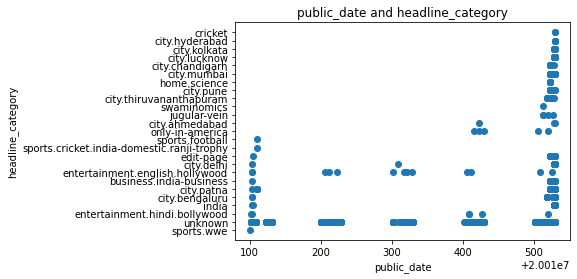

In [ ]:
plt.scatter(x,y)
plt.title("public_date and headline_category")
plt.xlabel("public_date")
plt.ylabel("headline_category")
plt.show()

In [ ]:
x=df["publish_date"]
y=df["headline_text"]

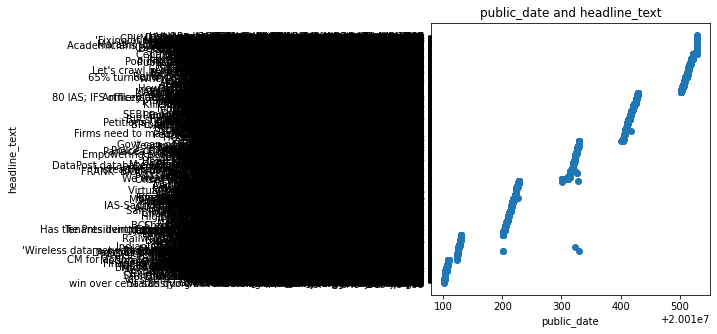

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.title("public_date and headline_text")
plt.xlabel("public_date")
plt.ylabel("headline_text")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


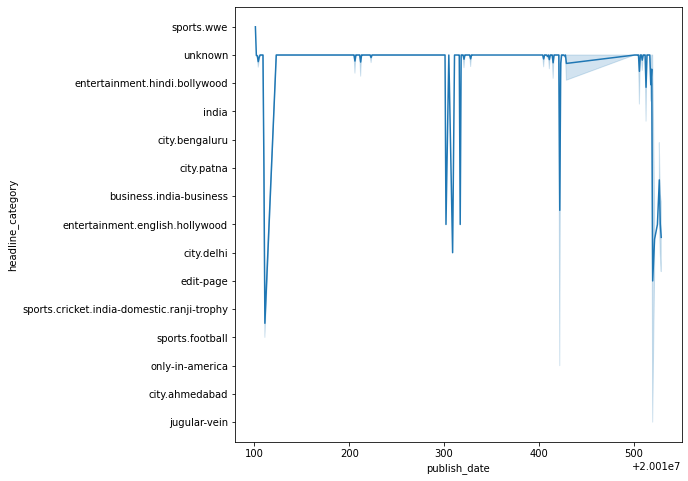

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x,y,data=df)

In [ ]:
x=df["publish_date"]
y=df["headline_text"]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


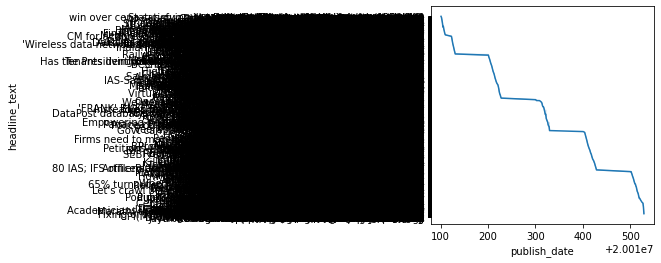

In [ ]:
plt.figure(figsize=(4,4))
sns.lineplot(x,y,data=df)

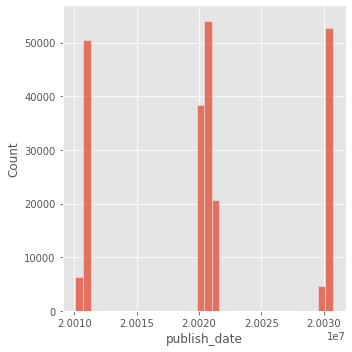

In [ ]:
sns.displot(df["publish_date"])

<Figure size 576x720 with 0 Axes>

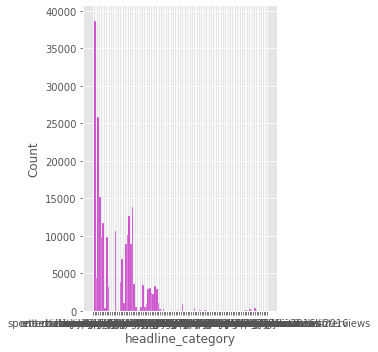

In [ ]:
plt.figure(figsize=(8,10))
sns.displot(df["headline_category"],color="m")

<Figure size 432x432 with 0 Axes>

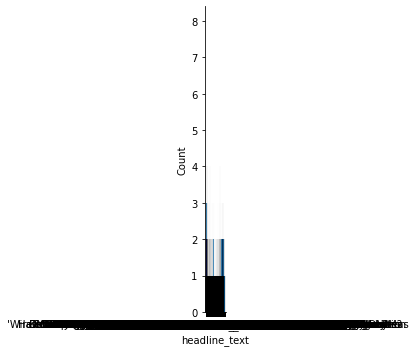

In [ ]:
plt.figure(figsize=(6,6))
sns.displot(df["headline_text"])

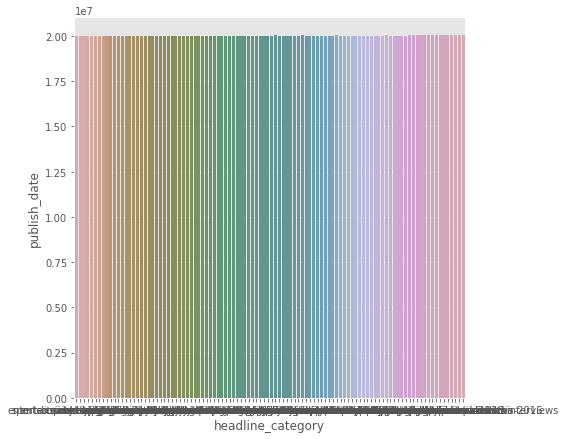

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(x=y,y=x,data=df,ci=13,orient="v",saturation=0.4)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


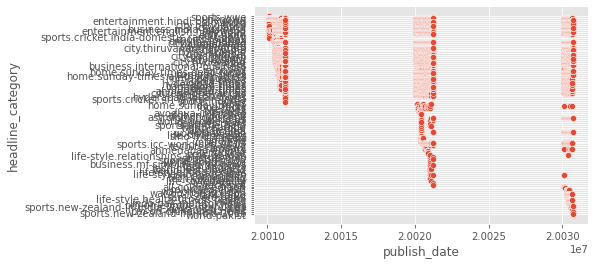

In [ ]:
sns.scatterplot(x,y,data=df)

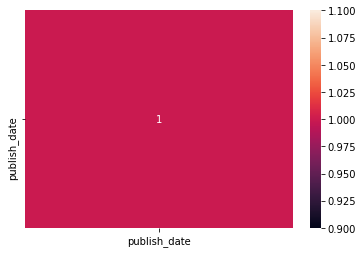

In [ ]:
sns.heatmap(df.corr(),annot=True)

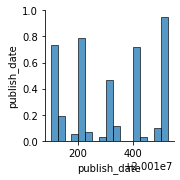

In [ ]:
sns.pairplot(df)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


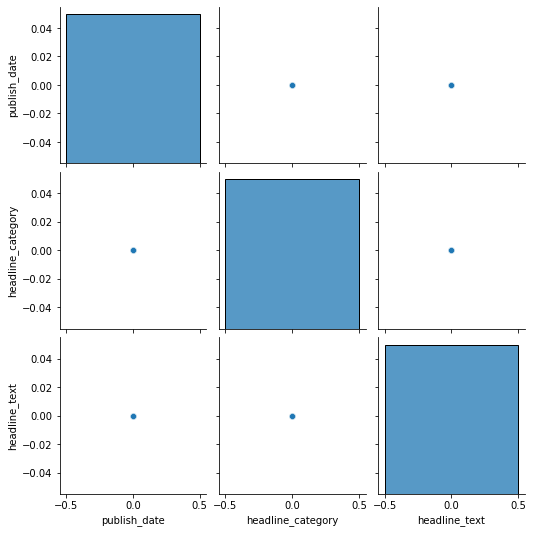

In [ ]:
sns.pairplot(df.isnull())

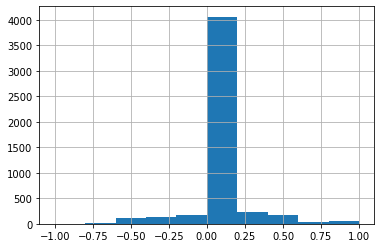

In [47]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df['polarity_score']=df['headline_text'].\
   apply(lambda x : polarity(x))
df['polarity_score'].hist()
plt.show()

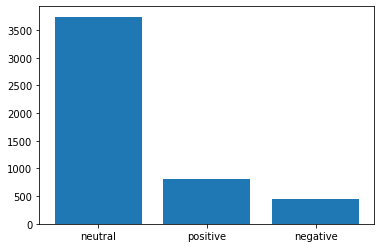

In [48]:
def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
df['polarity']=df['polarity_score'].\
   map(lambda x: sentiment(x))
plt.bar(df.polarity.value_counts().index,df.polarity.value_counts())
plt.show()

In [49]:
df[df['polarity']=='positive']['headline_text'].head()

0     win over cena satisfying but defeating underta...
5                  Extra buses to clear tourist traffic
13          Will Qureshi's return really help the govt?
31                 Extra buses to clear tourist traffic
39          Will Qureshi's return really help the govt?
Name: headline_text, dtype: object

In [50]:
df[df['polarity']=='negative']['headline_text'].head()

66         Destroying myths and doubts on sexuality
87         Powerless north India gropes in the dark
105                        10-year-old girl missing
132              Net lottery: A winner or a sucker?
143    Mental illness can pass from parent to child
Name: headline_text, dtype: object